In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, auc, precision_recall_curve, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, confusion_matrix, average_precision_score

import seaborn as sns
import matplotlib.pyplot as plt 

import sys

from moo_gbt._gb import MooGBTClassifier

pd.set_option('display.max_columns', None)

In [2]:
# plt.rcParams['figure.figsize'] = (18, 6)
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams["font.size"] = "20"

In [3]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["font.size"] = "20"
plt.rcParams["legend.fontsize"] = 12

#### Data Prep

In [4]:
train_data = pd.read_csv('data/train_data_sample_2.csv')
train_data.shape

(18751, 157)

In [5]:
train_data.head()

,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,is_booking,cnt,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,d74,d75,d76,d77,d78,d79,d80,d81,d82,d83,d84,d85,d86,d87,d88,d89,d90,d91,d92,d93,d94,d95,d96,d97,d98,d99,d100,d101,d102,d103,d104,d105,d106,d107,d108,d109,d110,d111,d112,d113,d114,d115,d116,d117,d118,d119,d120,d121,d122,d123,d124,d125,d126,d127,d128,d129,d130,d131,d132,d133,d134,d135,d136,d137,d138,d139,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,173.3135,0,0,2,1,1,0,1,-2.187308,-2.199214,-2.199214,-2.199214,-2.199214,-2.056527,-2.199214,-2.199214,-2.141472,-2.199214,-2.094493,-2.199214,-2.112620,-2.193742,-2.199214,-2.189270,-2.198801,-2.197897,-2.197207,-2.199214,-2.018428,-2.199214,-2.197207,-2.199214,-2.199214,-2.199214,-2.199214,-2.199214,-2.185156,-2.199214,-2.199214,-2.197207,-2.199214,-2.199214,-2.199214,-2.199214,-1.931921,-2.191240,-2.199214,-2.199214,-2.198889,-2.199214,-2.125292,-2.149234,-2.199214,-2.199214,-2.191240,-2.199214,-2.103117,-2.199214,-2.199214,-2.199214,-2.076937,-2.199214,-2.142703,-2.157068,-2.199214,-1.921280,-2.199214,-2.199214,-2.199214,-2.183411,-2.199214,-2.199214,-2.199214,-2.199214,-2.199214,-2.199214,-2.181475,-2.199214,-1.800043,-2.199214,-2.181475,-2.198416,-2.193566,-2.197189,-2.198991,-2.199214,-2.199214,-2.199214,-2.199214,-2.199214,-2.199214,-2.199072,-2.199214,-2.199214,-2.199214,-2.186653,-2.197207,-2.199214,-2.111770,-2.199214,-1.948083,-2.199214,-2.193220,-2.187957,-2.197207,-2.185737,-2.199214,-2.195209,-2.158898,-2.199214,-2.199214,-2.199214,-2.199214,-2.197207,-2.199214,-2.131393,-2.198177,-2.199214,-2.193220,-2.199214,-2.199214,-2.173446,-2.191240,-2.199214,-2.199214,-2.199214,-2.199214,-2.199214,-2.042828,-2.181188,-2.199214,-2.199214,-2.199214,-2.195421,-2.187308,-2.060802,-2.199214,-2.199214,-2.173818,-2.122009,-2.199214,-2.199214,-2.199214,-2.199214,-2.189270,-2.199214,-2.154507,-2.158898,-2.199214,-2.199214,-2.199214,-2.199214,-2.148035,-2.199214,-2.199214,-2.197207,-2.199214
1,36.7112,0,0,2,0,1,0,1,-2.292251,-2.299437,-2.299516,-2.081118,-2.012726,-1.846311,-2.256943,-2.241929,-2.296619,-2.272894,-2.089446,-2.299516,-2.073693,-2.126230,-2.299516,-1.907082,-2.224969,-2.130352,-2.299516,-2.299512,-2.286226,-2.294937,-2.299516,-2.248783,-2.256279,-2.271063,-2.077581,-2.278925,-2.019199,-2.170334,-2.299516,-2.299516,-2.298682,-2.134491,-2.181788,-2.298920,-1.510314,-2.299516,-2.299516,-2.272754,-2.122334,-2.264607,-1.861097,-2.299510,-2.249796,-2.259944,-2.292343,-2.169161,-1.785864,-2.284237,-2.293556,-2.288045,-2.050526,-2.299516,-2.192732,-2.055975,-2.287063,-1.835956,-2.271718,-2.299516,-2.283584,-2.299516,-2.299516,-2.271189,-2.299516,-2.166047,-2.265805,-2.290143,-2.288796,-2.299516,-2.276115,-2.291246,-2.165692,-2.092732,-2.121190,-2.298750,-2.267115,-1.875826,-2.231525,-1.893010,-2.262565,-2.159382,-2.261873,-2.204839,-2.276740,-2.299516,-2.299439,-2.268711,-2.297019,-2.299516,-2.046545,-2.299516,-1.561541,-2.083417,-2.299516,-2.251615,-2.167010,-2.299516,-2.286313,-2.299516,-2.218038,-2.258407,-2.269182,-2.294434,-2.291297,-2.288772,-2.299516,-1.880610,-2.172632,-2.298266,-2.297850,-2.250530,-2.299516,-2.288303,-2.299516,-2.299516,-2.298682,-2.299516,-2.298682,-2.282234,-2.216793,-1.924212,-2.299516,-2.298510,-2.299077,-2.241868,-2.298670,-2.135436,-2.242227,-1.986876,-2.297201,-1.858242,-2.279041,-2.298092,-2.299516,-2.074708,-2.129316,-2.299516,-1.735702,-2.298266,-2.145362,-2.289405,-2.299516,-2.293402,-2.298682,-2.299516,-2.293223,-2.299516,-2.217007
2,6027.9528,0,0,5,0,3,0,1,-2.186020,-2.280568,-2.290197,-2.126943,-2.092544,-1.932258,-2.256742,-2.274878,-1.690297,-2.248874,-2.175121,-2.290197,-2.049667,-2.022783,-2.290197,-2.036778,-2.235180,-2.256314,-2.288910,-2.182527

In [6]:
po = 'is_booking' # primary objective
so = 'is_package' # sub-objective

In [7]:
features = list(train_data.columns)
features.remove('is_booking')
outcome_flag = 'is_booking'
len(features)

156

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_data[features],\
                                                    train_data[outcome_flag],\
                                                    test_size=0.2,\
                                                    stratify=train_data[['is_package', 'is_booking']],\
                                                    random_state=2021
                                                   )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 156), (3751, 156), (15000,), (3751,))

In [9]:
y_train.value_counts()

0    13805
1     1195
Name: is_booking, dtype: int64

In [10]:
y_test.value_counts()

0    3452
1     299
Name: is_booking, dtype: int64

In [10]:
y_train_ = pd.DataFrame()
y_train_['is_booking'] = y_train
y_train_['is_package'] = X_train['is_package']

y_test_ = pd.DataFrame()
y_test_['is_booking'] = y_test
y_test_['is_package'] = X_test['is_package']

y_train_.shape, y_test_.shape

((15000, 2), (3751, 2))

In [11]:
# X_train.drop('is_package', axis=1, inplace=True)
# X_test.drop('is_package', axis=1, inplace=True)

In [12]:
def evaluate_results(y_prob, y_true, threshold=0.5):
    avg_precision = average_precision_score(y_true, y_prob)
    auc_roc = roc_auc_score(y_true, y_prob)
    return avg_precision, auc_roc

#### Unconstrained GBT on Primary Objective

In [21]:
unconstrained_gbt = MooGBTClassifier(
                        loss='deviance',
                        n_estimators=100,
                        random_state=2021
)

unconstrained_gbt.fit(X_train, y_train)

MooGBTClassifier(ccp_alpha=0.0, constraints=[], criterion='friedman_mse',
                 init=None, learning_rate=0.1, loss='deviance', max_depth=3,
                 max_features=None, max_leaf_nodes=None,
                 min_impurity_decrease=0.0, min_impurity_split=None,
                 min_samples_leaf=1, min_samples_split=2,
                 min_weight_fraction_leaf=0.0, n_estimators=100,
                 n_iter_no_change=None, random_state=2021, subsample=1.0,
                 tol=0.0001, validation_fraction=0.1, verbose=0,
                 warm_start=False)

In [15]:
def get_binomial_deviance_cost(pred, y):
    return -np.mean(y * np.log(pred) + (1-y) * np.log(1-pred))

pred_train = unconstrained_gbt.predict_proba(X_train)[:,1]
pred_test = unconstrained_gbt.predict_proba(X_test)[:,1]

# get sub-objective costs
so_train_cost = get_binomial_deviance_cost(pred_train, y_train_[so])
so_test_cost = get_binomial_deviance_cost(pred_test, y_test_[so])

print (f"""
Sub-objective cost train - {so_train_cost},
Sub-objective cost test  - {so_test_cost}
""")


Sub-objective cost train - 0.9292835375628071,
Sub-objective cost test  - 0.932535376136379



In [16]:
# Training Accuracies
po_auprc, po_auroc = evaluate_results(pred_train, y_train_.iloc[:,0])
so_auprc, so_auroc = evaluate_results(pred_train, y_train_.iloc[:,1])
print (f"""Training Accuracies
Primary Objective AUROC - {po_auroc}
Subobjective AUROC - {so_auroc}
""")

Training Accuracies
Primary Objective AUROC - 0.8068458005179737
Subobjective AUROC - 0.29053245824551593



In [17]:
# Validation Accuracies
po_auprc, po_auroc = evaluate_results(pred_test, y_test_.iloc[:,0])
so_auprc, so_auroc = evaluate_results(pred_test, y_test_.iloc[:,1])
print (f"""Validation Accuracies
Primary Objective AUROC - {po_auroc}
Subobjective AUROC - {so_auroc}
""")

Validation Accuracies
Primary Objective AUROC - 0.7213786201203704
Subobjective AUROC - 0.291705532936315



In [18]:
# Primary and Sceondary Loss Values for Training
print (f"""Training Losses - 
Primary Loss - {get_binomial_deviance_cost(pred_train, y_train_.iloc[:,0])}
Secondary Loss - {get_binomial_deviance_cost(pred_train, y_train_.iloc[:,1])}""")

Training Losses - 
Primary Loss - 0.22777149353278836
Secondary Loss - 0.9292835375628071


In [19]:
# Primary and Sceondary Loss Values for Validation
print (f"""Validation Losses -
Primary Loss - {get_binomial_deviance_cost(pred_test, y_test_.iloc[:,0])}
Secondary Loss - {get_binomial_deviance_cost(pred_test, y_test_.iloc[:,1])}""")

Validation Losses -
Primary Loss - 0.25218489588118365
Secondary Loss - 0.932535376136379


#### Constrained GBT

In [15]:
b = 0.65 # upper bound on cost
mu = 10

constrained_gbt = MooGBTClassifier(
                    loss='deviance',
                    n_estimators=100,
                    constraints=[{"mu":mu, "b":b}],
                    random_state=2021
)

constrained_gbt.fit(X_train, y_train_)

MooGBTClassifier(ccp_alpha=0.0, constraints=[{'alpha': 0, 'b': 0.65, 'mu': 10}],
                 criterion='friedman_mse', init=None, learning_rate=0.1,
                 loss='deviance', max_depth=3, max_features=None,
                 max_leaf_nodes=None, min_impurity_decrease=0.0,
                 min_impurity_split=None, min_samples_leaf=1,
                 min_samples_split=2, min_weight_fraction_leaf=0.0,
                 n_estimators=100, n_iter_no_change=None, random_state=2021,
                 subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
                 warm_start=False)

In [16]:
losses = constrained_gbt.loss_.get_losses()
losses.head()

,n_estimators,primary_objective,sub_objective_1
0,0,0.273768,0.698076
1,1,0.276905,0.610448
2,2,0.273078,0.627302
3,3,0.269804,0.643549
4,4,0.266972,0.659284


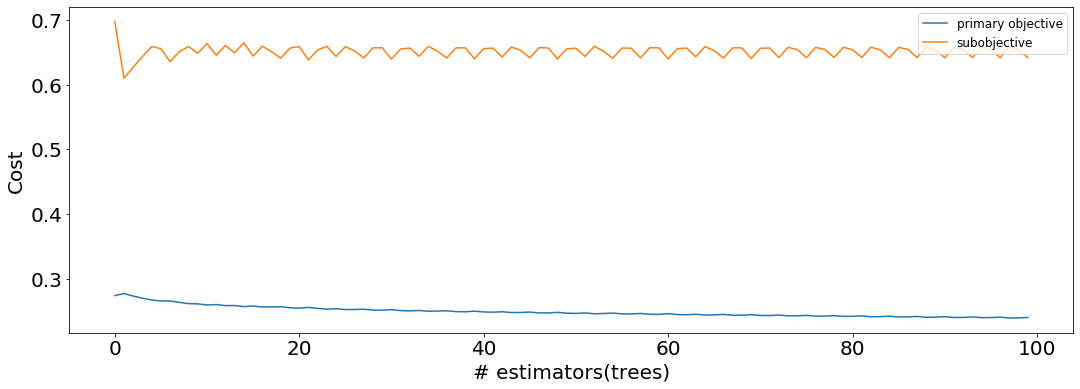

In [22]:
sns.lineplot(data=losses, x='n_estimators', y='primary_objective', label='primary objective')
sns.lineplot(data=losses, x='n_estimators', y='sub-objective-1', label='subobjective')
plt.xlabel("# estimators(trees)")
plt.ylabel("Cost")
plt.legend(loc = "upper right")

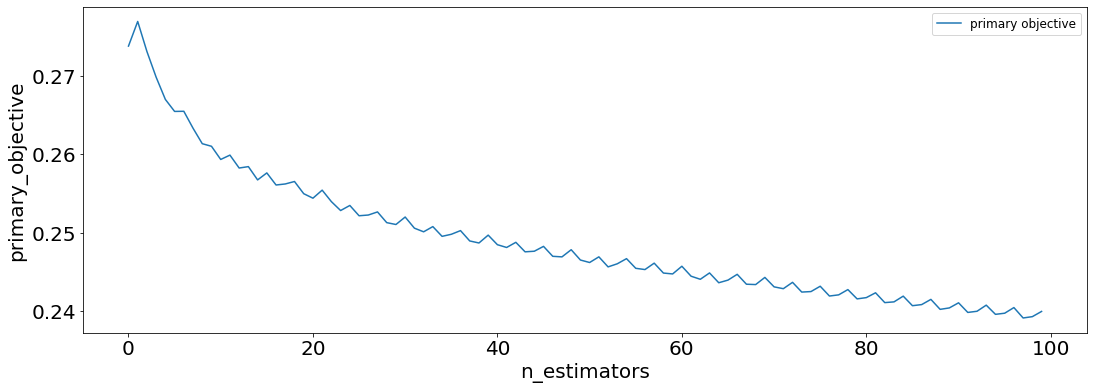

In [23]:
sns.lineplot(data=losses, x='n_estimators', y='primary_objective', label='primary objective')

#### Changing hyperparameters b and mu

In [24]:
bs = [0.9, 0.8, 0.7, 0.65, 0.6]
mus = [1000, 1000, 100, 10, 5]

# bs = [0.9]
# mus = [10000, 1000]

In [25]:
gbt_results = []
losses_master = pd.DataFrame()
for b in bs:
    for mu in mus:
        clf = MooGBTClassifier(loss="deviance", \
                                   constraints=[{"mu":mu, "b":b}])
        
        clf.fit(X_train, y_train_)
        
        losses = pd.DataFrame(clf.loss_.losses, columns=['primary',\
                                          'subobjective_1'])\
                                .reset_index()\
                                .rename(columns={'index': 'n_estimators'})
        losses['b'] = b
        losses['mu'] = mu
        losses['alpha'] = pd.DataFrame(clf.loss_.alphas)
        
        losses_master = pd.concat([losses_master, losses])
        
        pred = clf.predict_proba(X_test)[:,1]
        pred_train = clf.predict_proba(X_train)[:,1]
        
        # Validation Results
        po_val_auprc, po_val_auroc = evaluate_results(pred,\
                                                y_test_.iloc[:,0])
        so_val_auprc, so_val_auroc = evaluate_results(pred,\
                                                y_test_.iloc[:,1])
        
        # Training Results
        po_train_auprc, po_train_auroc = evaluate_results(pred_train,\
                                                    y_train_.iloc[:,0])
        so_train_auprc, so_train_auroc = evaluate_results(pred_train,\
                                                    y_train_.iloc[:,1])
        
        
        # Training Losses
        po_loss_train = get_binomial_deviance_cost(pred_train, y_train_.iloc[:,0])
        so_loss_train = get_binomial_deviance_cost(pred_train, y_train_.iloc[:,1])
        
        # Testing Losses
        po_loss_val = get_binomial_deviance_cost(pred, y_test_.iloc[:,0])
        so_loss_val = get_binomial_deviance_cost(pred, y_test_.iloc[:,1])
        
        gbt_res = [b, mu, po_train_auroc, so_train_auroc, po_val_auroc,\
                   so_val_auroc, po_loss_train, so_loss_train,\
                   po_loss_val, so_loss_val]
        
        gbt_results.append(gbt_res)

gbt_results_df = pd.DataFrame(gbt_results, columns=['b', 'mu', 'po_train_auroc',\
                                                    'so_train_auroc', 'po_val_auroc',\
                                                    'so_val_auroc', 'po_loss_train',\
                                                    'so_loss_train', 'po_loss_val',\
                                                    'so_loss_val'])

In [ ]:
po_auroc = 0.7213786201203704
so_auroc = 0.291705532936315

In [30]:
gbt_results_df['po_gain'] = ((gbt_results_df['po_val_auroc'] - po_auroc)/po_auroc)*100
gbt_results_df['so_gain'] = ((gbt_results_df['so_val_auroc'] - so_auroc)/so_auroc)*100

In [31]:
gbt_results_df

,b,mu,po_train_auroc,so_train_auroc,po_val_auroc,so_val_auroc,po_loss_train,so_loss_train,po_loss_val,so_loss_val,po_gain,so_gain
0,0.90,1000,0.790331,0.566643,0.678841,0.576453,0.236490,0.660478,0.263068,0.657124,-5.896696,97.614736
1,0.90,1000,0.790331,0.566643,0.678974,0.576152,0.236490,0.660478,0.263162,0.657246,-5.878296,97.511617
2,0.90,100,0.729833,0.758638,0.613440,0.768211,0.252459,0.560524,0.280910,0.554970,-14.962807,163.351687
3,0.90,10,0.814318,0.305273,0.716287,0.305722,0.226785,0.900278,0.254379,0.901393,-0.705777,4.805032
4,0.90,5,0.812505,0.303491,0.715378,0.302918,0.226652,0.904038,0.254592,0.906238,-0.831890,3.843895
5,0.80,1000,0.674920,0.916271,0.589146,0.918022,0.265386,0.485378,0.284236,0.482341,-18.330592,214.708567
6,0.80,1000,0.674920,0.916271,0.589298,0.918207,0.265386,0.485378,0.284184,0.482363,-18.309506,214.771714
7,0.80,100,0.804852,0.405742,0.708862,0.408621,0.233320,0.763753,0.256798,0.761313,-1.735029,40.079995
8,0.80,10,0.806949,0.392185,0.711660,0.391166,0.231438,0.810460,0.255571,0.810673,-1.347289,34.096262
9,0.80,5,0.811138,0.396455,0.708129,0.397965,0.229999,0.810006,0.256504,0.808368,-1.836766,36.426973


In [32]:
gbt_results_df.to_csv('gbt_results_df.csv', index=False)
losses_master.to_csv('losses_master.csv', index=False)

In [33]:
def plot_losses(b_, mu_, ):
    losses = losses_master[(losses_master['b']==b_) & (losses_master['mu']==mu_)]
    
    plt.subplot(1, 2, 1)
    sns.lineplot(data=losses, x='n_estimators', y='primary', label='primary objective')
    sns.lineplot(data=losses, x='n_estimators', y='subobjective_1', label='subobjective')
    plt.legend(loc = "upper left", prop={'size': 2})
    plt.title(f"mu = {mu_}, b = {b_}")
    plt.xlabel("# estimators(trees)")
    plt.ylabel("Cost")
    plt.legend(loc = "upper right")

    plt.subplot(1, 2, 2)
    sns.lineplot(data=losses, x='n_estimators', y='alpha')

    plt.title(f"mu = {mu_}, b = {b_}")
    plt.xlabel("# estimators(trees)")
    plt.ylabel("Alpha")

    plt.show()

In [34]:
def plot_primary_loss(b_, mu_):
    losses = losses_master[(losses_master['b']==b_) & (losses_master['mu']==mu_)]

    sns.lineplot(data=losses, x='n_estimators', y='primary', label='primary objective')
    plt.legend(loc = "upper left", prop={'size': 2})
    plt.title(f"Primary Objective Cost, mu = {mu_}, b = {b_}")
    plt.xlabel("# estimators(trees)")
    plt.ylabel("Cost")
    plt.legend(loc = "upper left")
    plt.show()

In [35]:
def plot_sub_loss(b_, mu_):
    losses = losses_master[(losses_master['b']==b_) & (losses_master['mu']==mu_)]

    sns.lineplot(data=losses, x='n_estimators', y='subobjective_1', label='subobjective')
    plt.legend(loc = "upper left", prop={'size': 2})
    plt.title(f"Primary Objective Cost, mu = {mu_}, b = {b_}")
    plt.xlabel("# estimators(trees)")
    plt.ylabel("Cost")
    plt.legend(loc = "upper left")
    plt.show()

In [36]:
def plot_alphas(b_, mu_):
    losses = losses_master[(losses_master['b']==b_) & (losses_master['mu']==mu_)]

    sns.lineplot(data=losses, x='n_estimators', y='alpha')
    sns.lineplot(data=losses, x='n_estimators', y='alpha', label='subobjective')

    plt.xticks(np.arange(0, losses['n_estimators'].max() + 5, 5))

    plt.title(f"mu = {mu_}, b = {b_}")
    plt.xlabel("# estimators(trees)")
    plt.ylabel("Alpha Value")
    plt.legend()
    plt.show()

In [37]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["font.size"] = "20"
plt.rcParams["legend.fontsize"] = 12

# params = {'legend.fontsize': 20,
#           'legend.handlelength': 2}
# plot.rcParams.update(params)

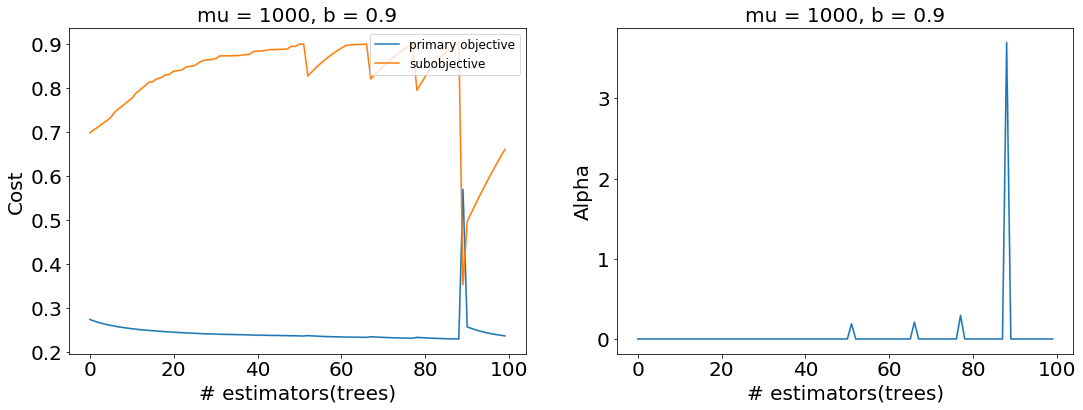

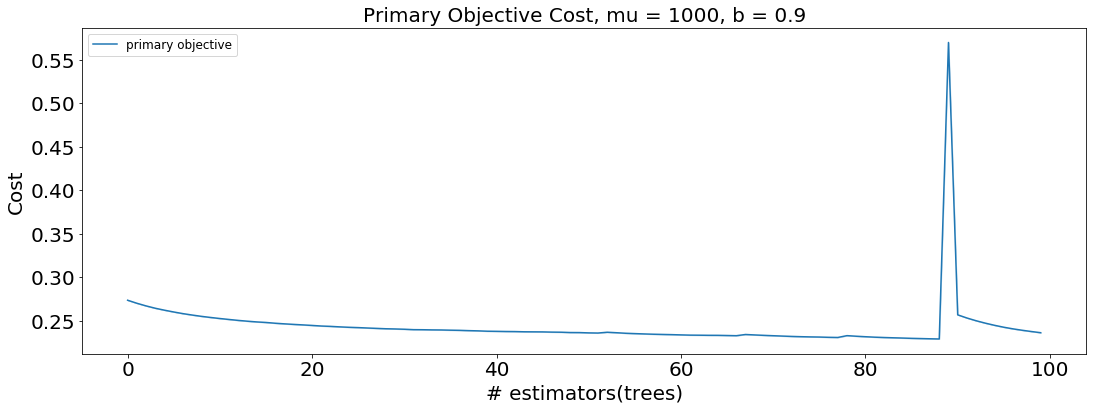

In [39]:
b_ = 0.9
mu_ = 1000
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

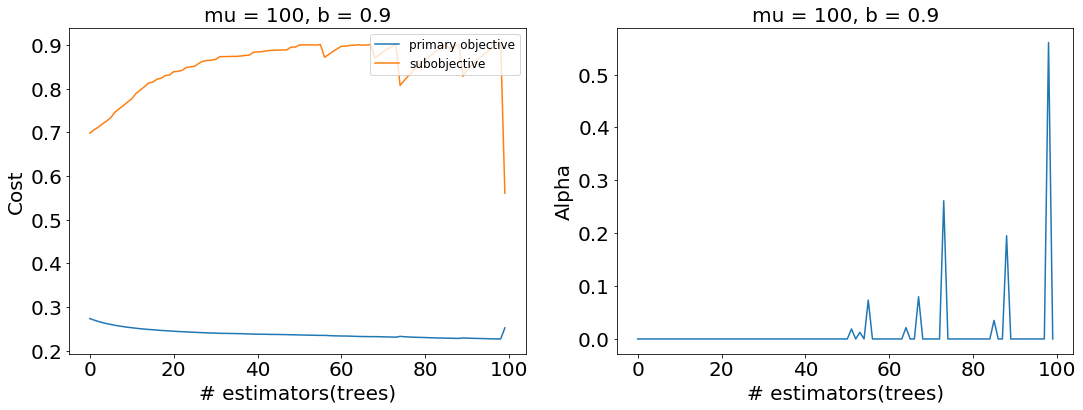

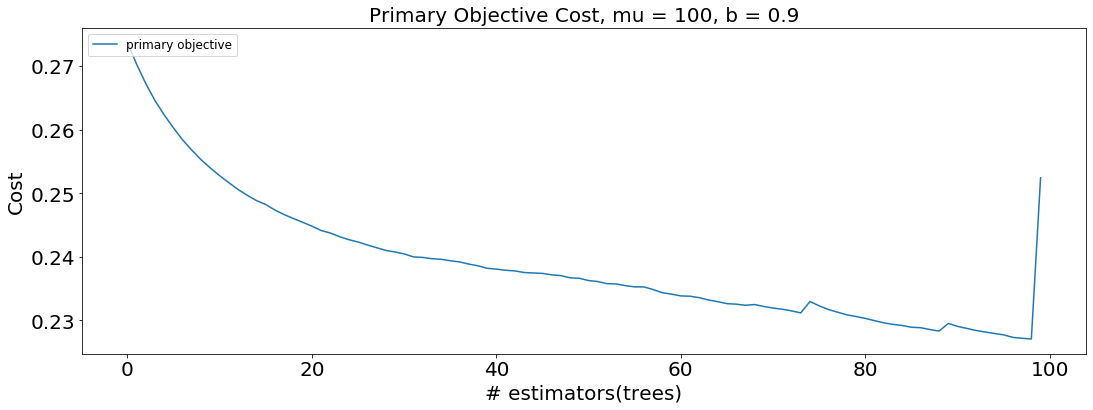

In [40]:
b_ = 0.9
mu_ = 100
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

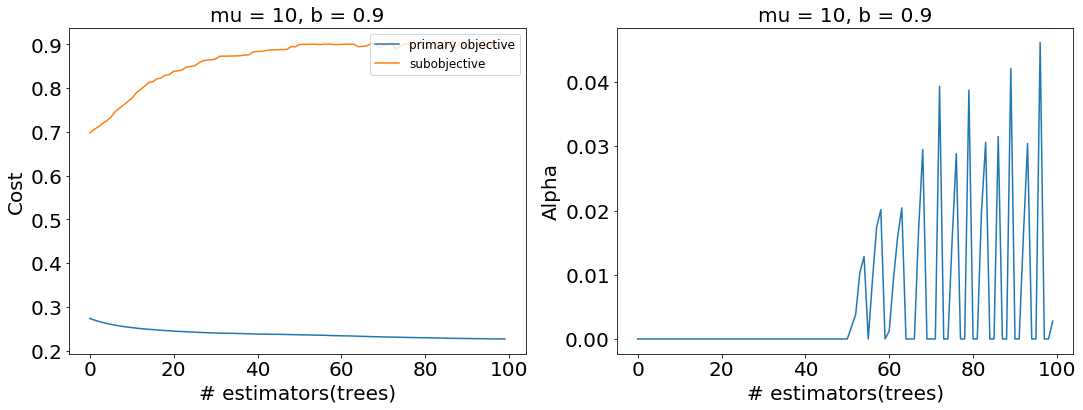

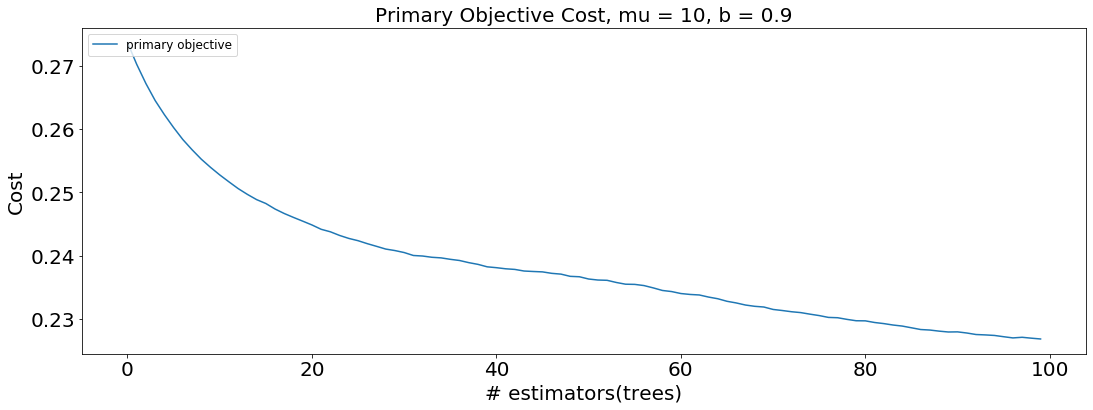

In [42]:
b_ = 0.9
mu_ = 10
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

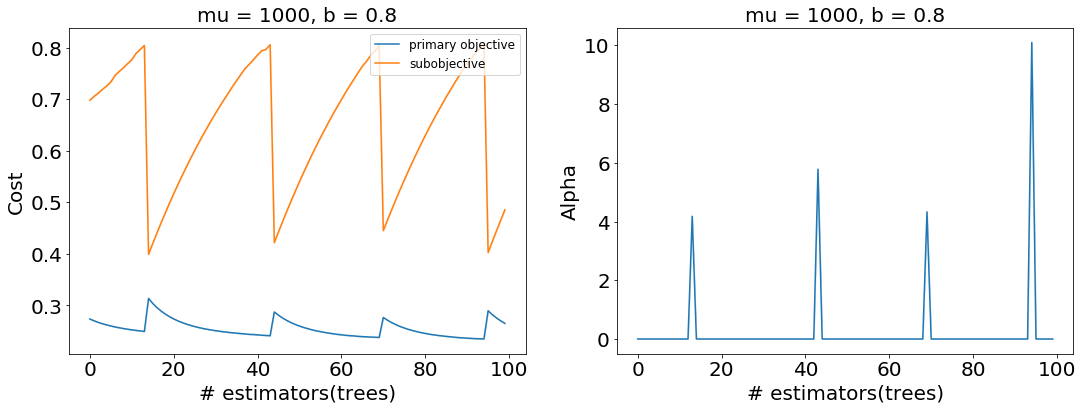

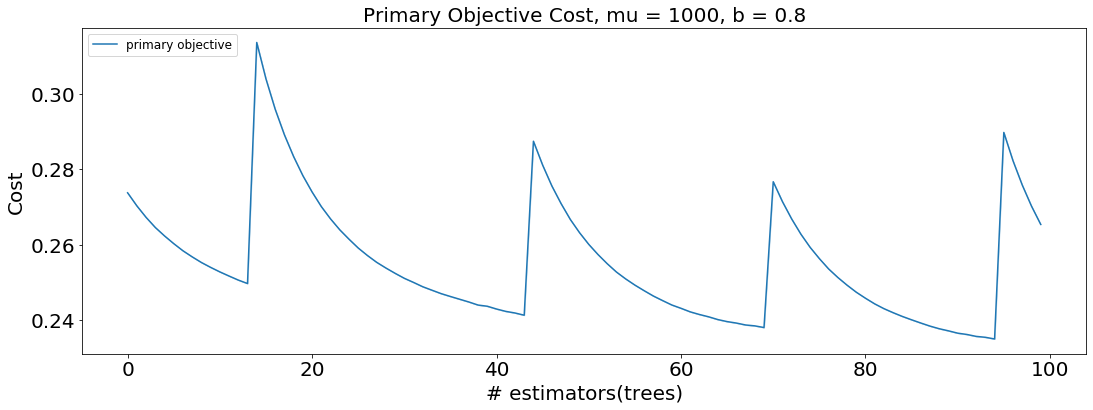

In [41]:
b_ = 0.8
mu_ = 1000
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

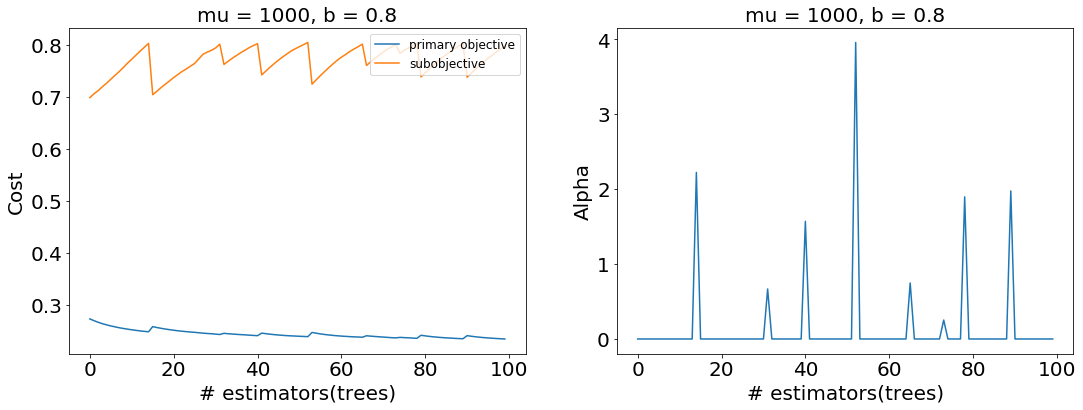

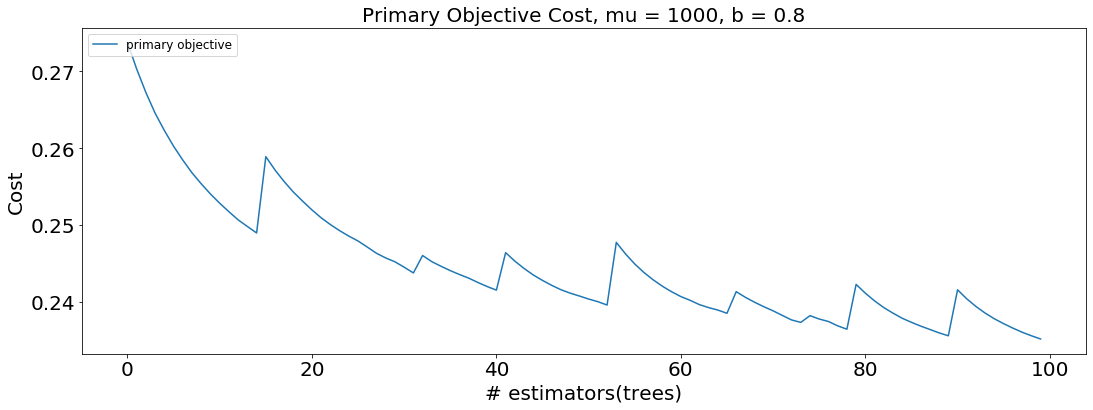

In [260]:
b_ = 0.8
mu_ = 100
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

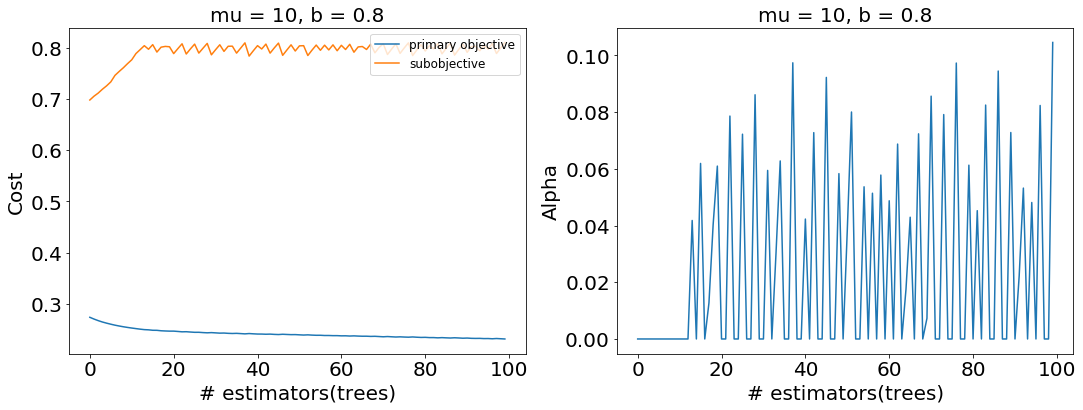

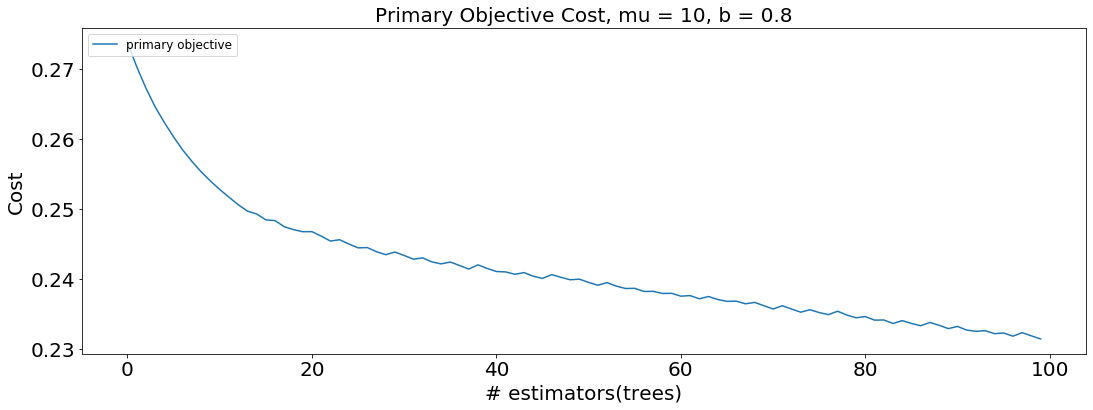

In [43]:
b_ = 0.8
mu_ = 10
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)


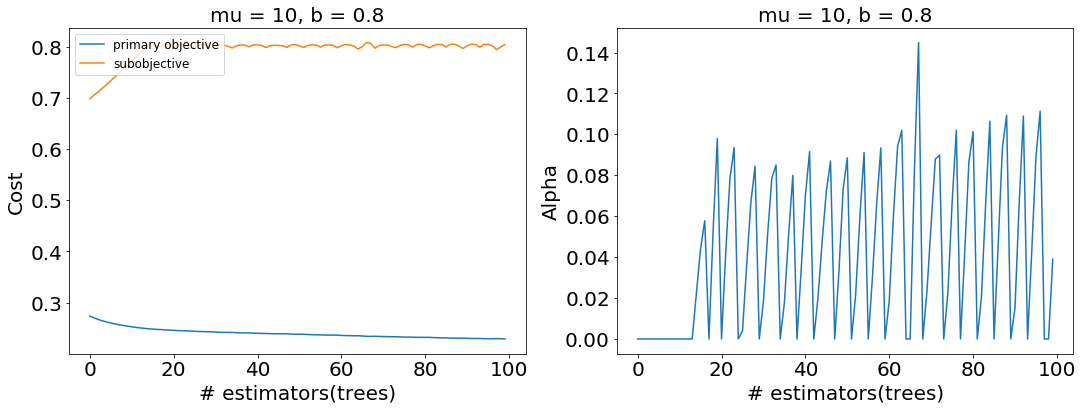

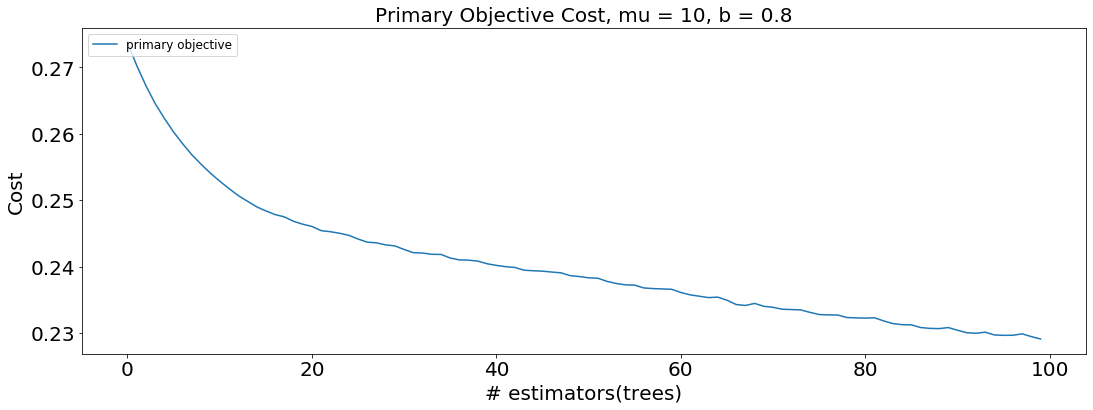

In [247]:
b_ = 0.8
mu_ = 10
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

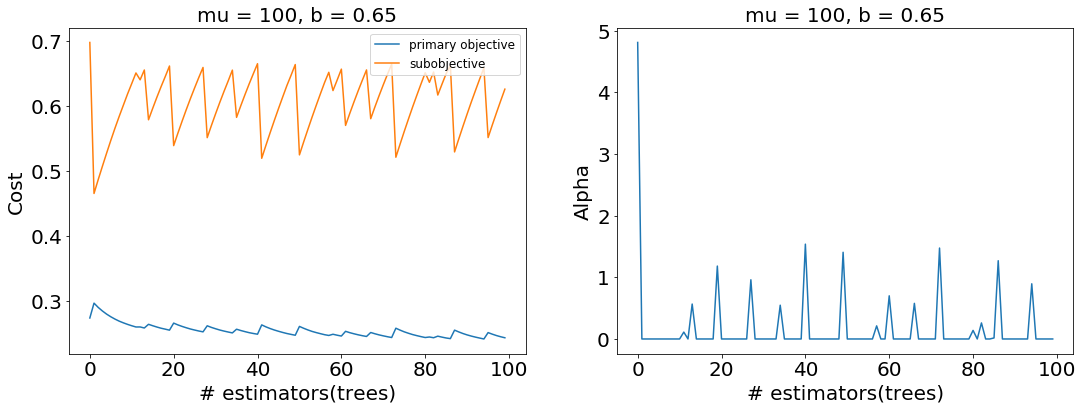

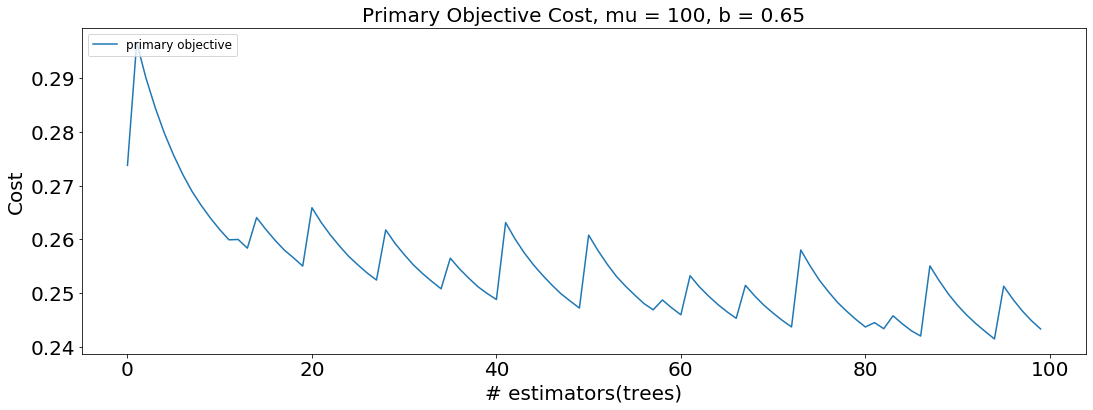

In [44]:
b_ = 0.65
mu_ = 100
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

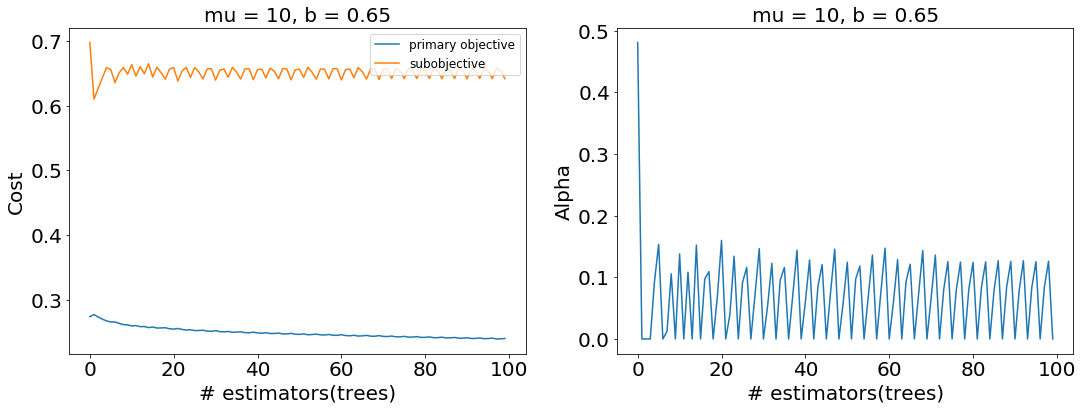

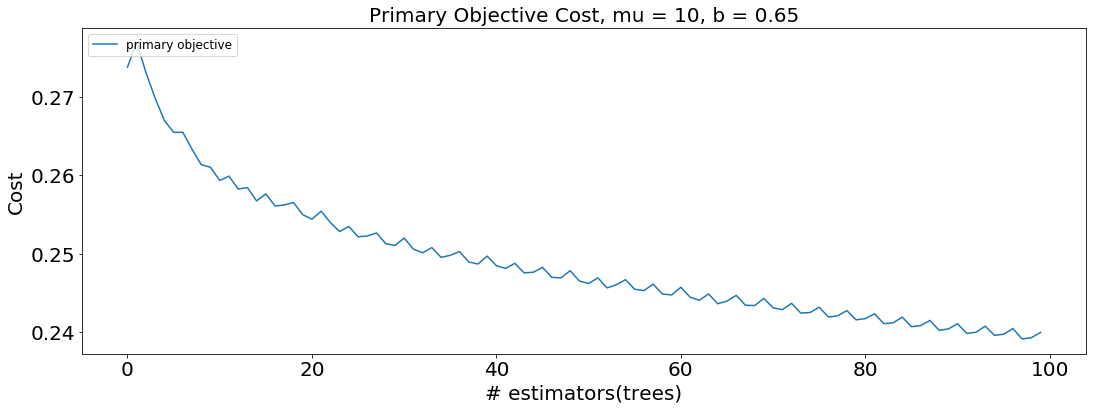

In [45]:
b_ = 0.65
mu_ = 10
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

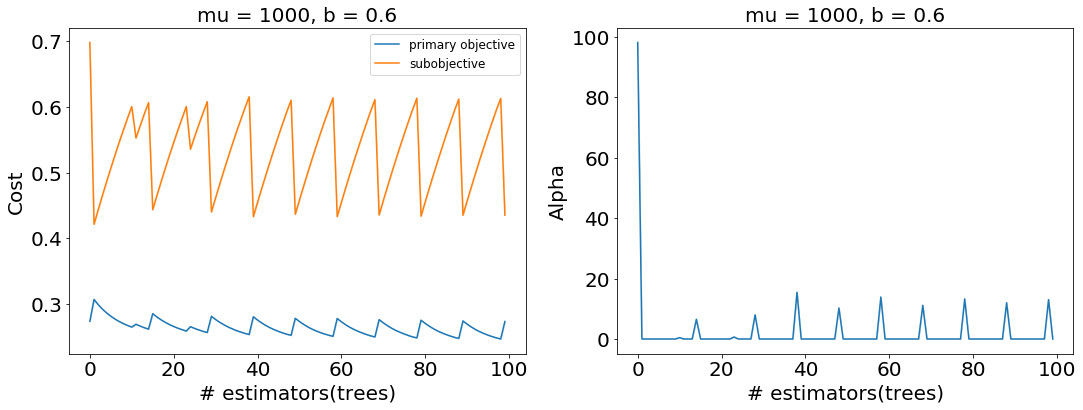

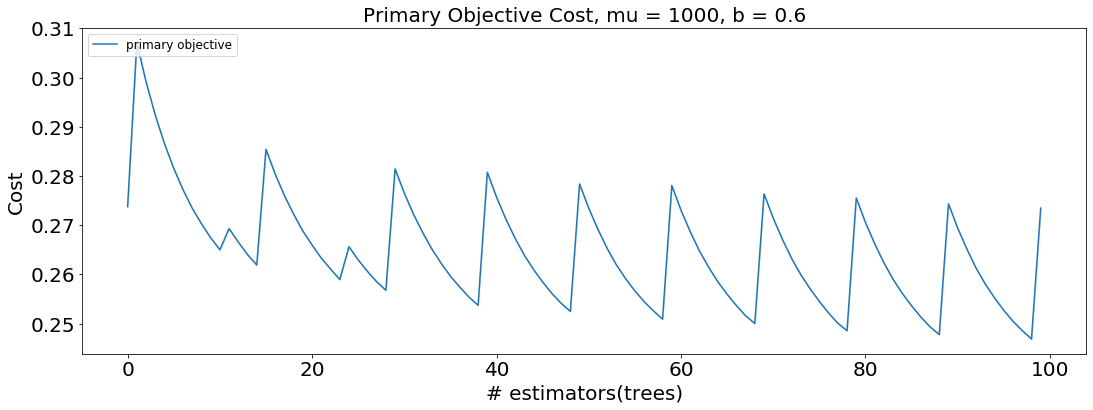

In [46]:
b_ = 0.6
mu_ = 1000
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

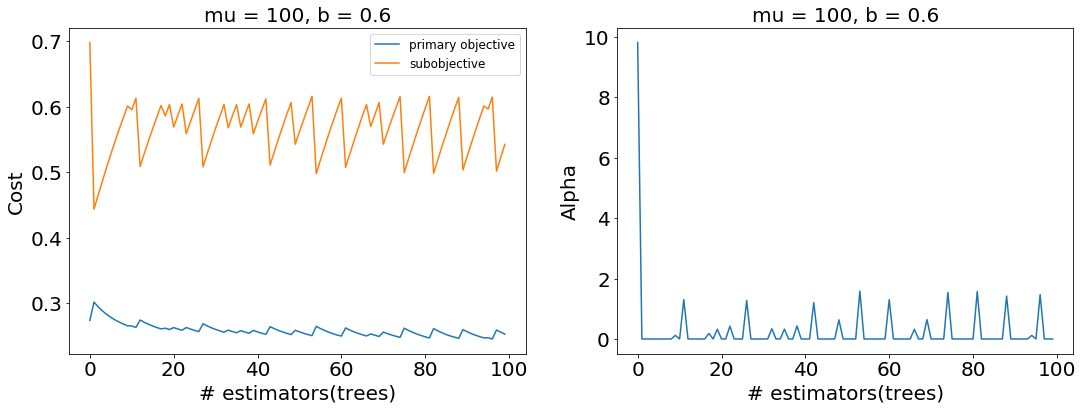

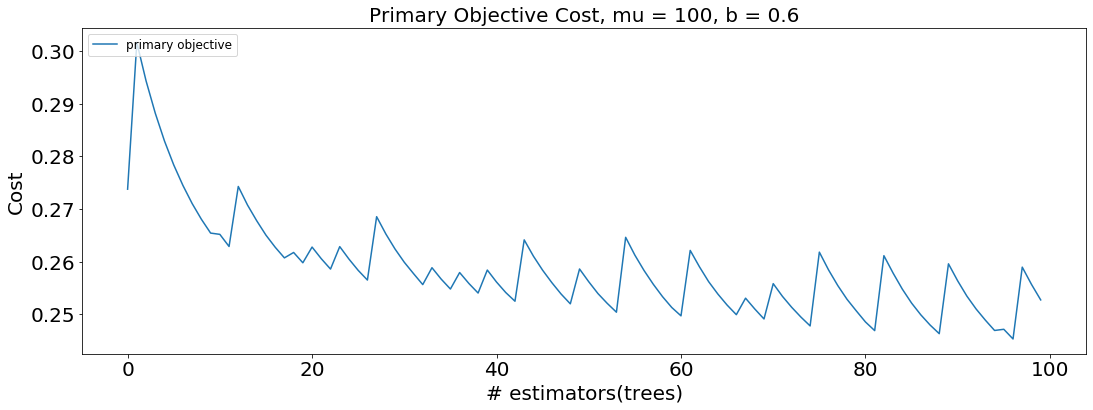

In [47]:
b_ = 0.6
mu_ = 100
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

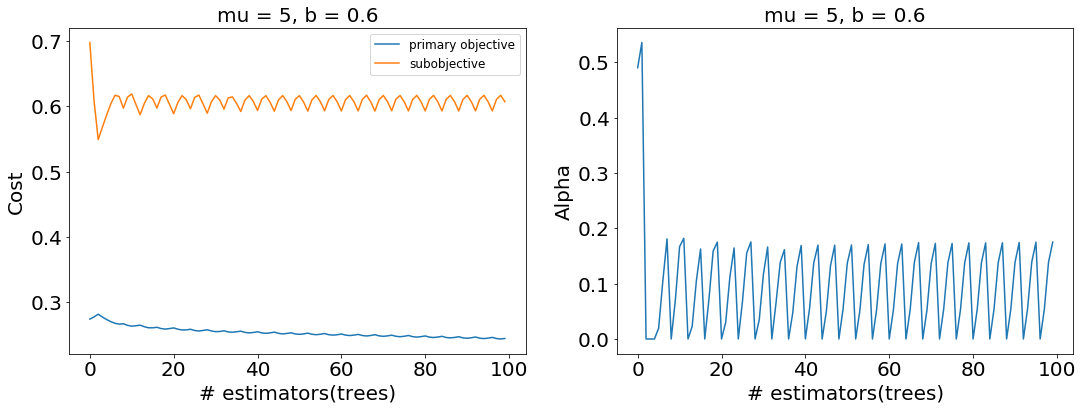

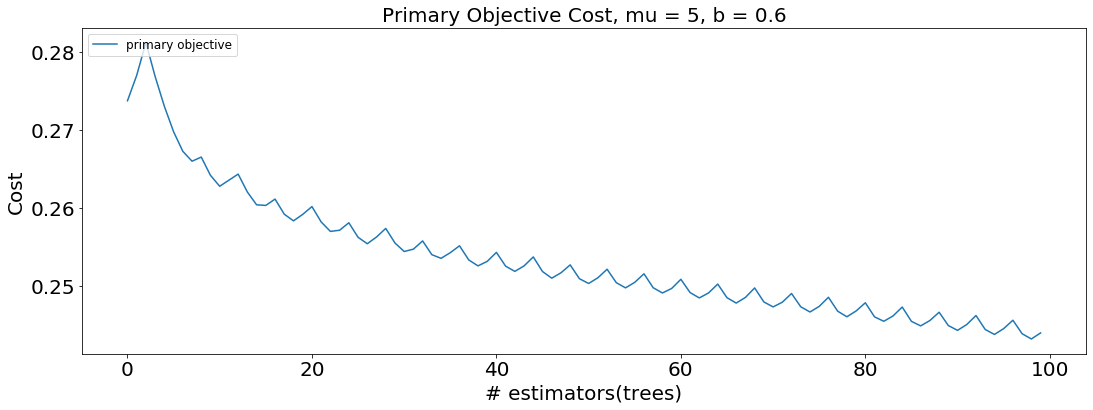

In [49]:
b_ = 0.6
mu_ = 5
plot_losses(b_, mu_)
plot_primary_loss(b_, mu_)

#### Scalarization

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

##### Primary Objective Unconstrained GBT

In [80]:
po, so

('is_booking', 'is_package')

In [115]:
features_1 = features + ['is_package']

In [116]:
outcome_flag = po
X_train, X_test, y_train, y_test = train_test_split(train_data[features_1],\
                                                    train_data[outcome_flag],\
                                                    test_size=0.2,\
                                                    stratify=train_data[['is_package', 'is_booking']],\
                                                    random_state=2021
                                                   )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 156), (3751, 156), (15000,), (3751,))

In [117]:
model_1 = GradientBoostingClassifier(
                    loss='deviance',
                    n_estimators=100,
                    random_state=2021
)

model_1.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2021, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [118]:
pred_train_po = model_1.predict_proba(X_train)[:,1]
pred_test_po = model_1.predict_proba(X_test)[:,1]

po_train_auprc, po_train_auroc = evaluate_results(pred_train_po,\
                                                y_train)

po_val_auprc, po_val_auroc = evaluate_results(pred_test_po,\
                                                y_test)
po_train_auroc, po_val_auroc

(0.8067425088538959, 0.7214793808639846)

##### Primary Objective Unconstrained GBT

In [119]:
len(features)

155

In [120]:
# features.remove('is_package')

In [121]:
outcome_flag = so
X_train, X_test, y_train, y_test = train_test_split(train_data[features],\
                                                    train_data[outcome_flag],\
                                                    test_size=0.2,\
                                                    stratify=train_data[['is_package', 'is_booking']],\
                                                    random_state=2021
                                                   )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 155), (3751, 155), (15000,), (3751,))

In [122]:
model_2 = GradientBoostingClassifier(
                    loss='deviance',
                    n_estimators=100,
                    random_state=2021
)

model_2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2021, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [123]:
pred_train_so = model_2.predict_proba(X_train)[:,1]
pred_test_so = model_2.predict_proba(X_test)[:,1]

so_train_auprc, so_train_auroc = evaluate_results(pred_train_so,\
                                                y_train)

so_val_auprc, so_val_auroc = evaluate_results(pred_test_so,\
                                                y_test)
so_train_auroc, so_val_auroc

(0.8430754782598948, 0.8163999832887701)

In [124]:
features_ = features + [po, so]
X_train, X_test = train_test_split(train_data[features_],\
                                    test_size=0.2,\
                                    stratify=train_data[['is_package', 'is_booking']],\
                                    random_state=2021
                                   )
X_train.shape, X_test.shape

((15000, 157), (3751, 157))

In [125]:
len(features)

155

In [127]:
# features.append('is_package')
pred_train_po = model_1.predict_proba(X_train[features_1])[:,1]
pred_test_po = model_1.predict_proba(X_test[features_1])[:,1]

# features.remove('is_package')
pred_train_so = model_2.predict_proba(X_train[features])[:,1]
pred_test_so = model_2.predict_proba(X_test[features])[:,1]

In [128]:
scalar_train = pd.DataFrame()

scalar_train['po_pred'] = pred_train_po
scalar_train['so_pred'] = pred_train_so

scalar_train['po_true'] = X_train[po].tolist()
scalar_train['so_true'] = X_train[so].tolist()

scalar_test = pd.DataFrame()

scalar_test['po_pred'] = pred_test_po
scalar_test['so_pred'] = pred_test_so

scalar_test['po_true'] = X_test[po].tolist()
scalar_test['so_true'] = X_test[so].tolist()

scalar_train.shape, scalar_test.shape

((15000, 4), (3751, 4))

In [129]:
res = []
for wt_ in range(1, 10):
    wt = float(wt_/10)
    w1 = wt
    w2 = 1 - wt
    
    scalar_train['weighted_score'] = w1 * scalar_train['po_pred'] + \
                                     w2 * scalar_train['so_pred']

    scalar_test['weighted_score'] = w1 * scalar_test['po_pred'] + \
                                    w2 * scalar_test['so_pred']
    
    _, po_train_auroc = evaluate_results(scalar_train['weighted_score']\
                     , scalar_train['po_true'])
    _, so_train_auroc = evaluate_results(scalar_train['weighted_score']\
                     , scalar_train['so_true'])
    
    _, po_test_auroc = evaluate_results(scalar_test['weighted_score']\
                     , scalar_test['po_true'])
    _, so_test_auroc = evaluate_results(scalar_test['weighted_score']\
                     , scalar_test['so_true'])
    
    l = [w1, w2, po_train_auroc, so_train_auroc, po_test_auroc, so_test_auroc]
    
    res.append(l)
    
res_df = pd.DataFrame(res, columns=['w1', 'w2', 'po_train_auroc', \
                                    'so_train_auroc', 'po_test_auroc',\
                                    'so_test_auroc'])
res_df.shape

(9, 6)

In [75]:
scalar_train['po_true'].value_counts()

0    13805
1     1195
Name: po_true, dtype: int64

In [76]:
scalar_test['po_true'].value_counts()

0    3452
1     299
Name: po_true, dtype: int64

In [77]:
scalar_train['so_true'].value_counts()

0    11261
1     3739
Name: so_true, dtype: int64

In [78]:
scalar_test['so_true'].value_counts()

0    2816
1     935
Name: so_true, dtype: int64

In [130]:
res_df

,w1,w2,po_train_auroc,so_train_auroc,po_test_auroc,so_test_auroc
0,0.1,0.9,0.404459,0.841821,0.400868,0.814337
1,0.2,0.8,0.434047,0.839531,0.413451,0.811092
2,0.3,0.7,0.469698,0.835152,0.429599,0.805548
3,0.4,0.6,0.511016,0.827151,0.451709,0.795806
4,0.5,0.5,0.558968,0.812353,0.481267,0.778483
5,0.6,0.4,0.613957,0.784366,0.521607,0.748781
6,0.7,0.3,0.674730,0.732273,0.571582,0.698271
7,0.8,0.2,0.739785,0.634734,0.631574,0.609748
8,0.9,0.1,0.801156,0.445425,0.699006,0.437452


In [132]:
po_auroc = 0.7213786201203704
so_auroc = 0.291705532936315

res_df['po_gain'] = ((res_df['po_test_auroc'] - po_auroc)/po_auroc)*100
res_df['so_gain'] = ((res_df['so_test_auroc'] - so_auroc)/so_auroc)*100

In [133]:
res_df

,w1,w2,po_train_auroc,so_train_auroc,po_test_auroc,so_test_auroc,po_gain,so_gain
0,0.1,0.9,0.404459,0.841821,0.400868,0.814337,-44.430305,179.164220
1,0.2,0.8,0.434047,0.839531,0.413451,0.811092,-42.685941,178.051661
2,0.3,0.7,0.469698,0.835152,0.429599,0.805548,-40.447467,176.151131
3,0.4,0.6,0.511016,0.827151,0.451709,0.795806,-37.382474,172.811500
4,0.5,0.5,0.558968,0.812353,0.481267,0.778483,-33.285073,166.872947
5,0.6,0.4,0.613957,0.784366,0.521607,0.748781,-27.692982,156.690654
6,0.7,0.3,0.674730,0.732273,0.571582,0.698271,-20.765355,139.375352
7,0.8,0.2,0.739785,0.634734,0.631574,0.609748,-12.449006,109.028460
8,0.9,0.1,0.801156,0.445425,0.699006,0.437452,-3.101322,49.963609


In [134]:
res_df[['w1', 'w2', 'po_test_auroc', 'po_gain', 'so_test_auroc', 'so_gain']]

,w1,w2,po_test_auroc,po_gain,so_test_auroc,so_gain
0,0.1,0.9,0.400868,-44.430305,0.814337,179.164220
1,0.2,0.8,0.413451,-42.685941,0.811092,178.051661
2,0.3,0.7,0.429599,-40.447467,0.805548,176.151131
3,0.4,0.6,0.451709,-37.382474,0.795806,172.811500
4,0.5,0.5,0.481267,-33.285073,0.778483,166.872947
5,0.6,0.4,0.521607,-27.692982,0.748781,156.690654
6,0.7,0.3,0.571582,-20.765355,0.698271,139.375352
7,0.8,0.2,0.631574,-12.449006,0.609748,109.028460
8,0.9,0.1,0.699006,-3.101322,0.437452,49.963609
